In [2]:
import dask
import numpy as np
import pandas as pd
from dask.distributed import Client
import os
import dask.dataframe as dd
import numpy.ma as ma
import splinv.utility as utility

import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
#matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [10,6.0]
matplotlib.rc('font',**{'family':'serif','serif':['Times New Roman']})
matplotlib.rc('text', usetex=True)

from astropy.io import fits


In [134]:
# # lbd = 2, mass
# mass_0 = fits.open('Detection_Masses/reconstructed_mass_nfw146_lbd2.fits')[0].data
# mass_1 = fits.open('Detection_Masses/reconstructed_mass_nfw148_lbd2.fits')[0].data
# mass_2 = fits.open('Detection_Masses/reconstructed_mass_nfw150_lbd2.fits')[0].data
# mass_3 = fits.open('Detection_Masses/reconstructed_mass_nfw152_lbd2.fits')[0].data
# masses = [mass_0,mass_1,mass_2,mass_3]

# #lbd 2, mass std
# mass_std_0 = fits.open('Detection_Masses/reconstructed_mass_std_nfw146_lbd2.fits')[0].data
# mass_std_1 = fits.open('Detection_Masses/reconstructed_mass_std_nfw148_lbd2.fits')[0].data
# mass_std_2 = fits.open('Detection_Masses/reconstructed_mass_std_nfw150_lbd2.fits')[0].data
# mass_std_3 = fits.open('Detection_Masses/reconstructed_mass_std_nfw152_lbd2.fits')[0].data
# masses_std = [mass_std_0,mass_std_1,mass_std_2,mass_std_3]
# #lbd 2, detection number
# detect_num = fits.open('Detection_Params/true_detections_num_nfw_lbd2.fits')[0].data


#lbd = 4, mass
mass_0 = fits.open('Detection_Masses/reconstructed_mass_nfw148_lbd4.fits')[0].data
mass_1 = fits.open('Detection_Masses/reconstructed_mass_nfw150_lbd4.fits')[0].data
mass_2 = fits.open('Detection_Masses/reconstructed_mass_nfw152_lbd4.fits')[0].data
mass_3 = fits.open('Detection_Masses/reconstructed_mass_nfw154_lbd4.fits')[0].data
masses = [mass_0,mass_1,mass_2,mass_3]

#lbd 4, mass std
mass_std_0 = fits.open('Detection_Masses/reconstructed_mass_std_nfw148_lbd4.fits')[0].data
mass_std_1 = fits.open('Detection_Masses/reconstructed_mass_std_nfw150_lbd4.fits')[0].data
mass_std_2 = fits.open('Detection_Masses/reconstructed_mass_std_nfw152_lbd4.fits')[0].data
mass_std_3 = fits.open('Detection_Masses/reconstructed_mass_std_nfw154_lbd4.fits')[0].data
masses_std = [mass_std_0,mass_std_1,mass_std_2,mass_std_3]
#lbd 4, detection number
detect_num = fits.open('Detection_Params/true_detections_num_nfw_lbd4.fits')[0].data

In [135]:
from astropy.io import fits
file1_fits = fits.open('sep27_nfw146lbd4_noiseless.fits')
file1 = file1_fits[1].data
input_redshift = np.array(file1['input_redshift'])
input_a_over_c = np.array(file1['input_a_over_c'])
redshift_vals = input_redshift[:,0]
input_a_over_c_val = input_a_over_c[0]

#true_log_mass = np.array([14.6,14.8,15.0,15.2]) 
true_log_mass = np.array([14.8,15.0,15.2,15.4]) 

In [139]:
masses = np.where(masses == -np.inf, np.nan, masses)

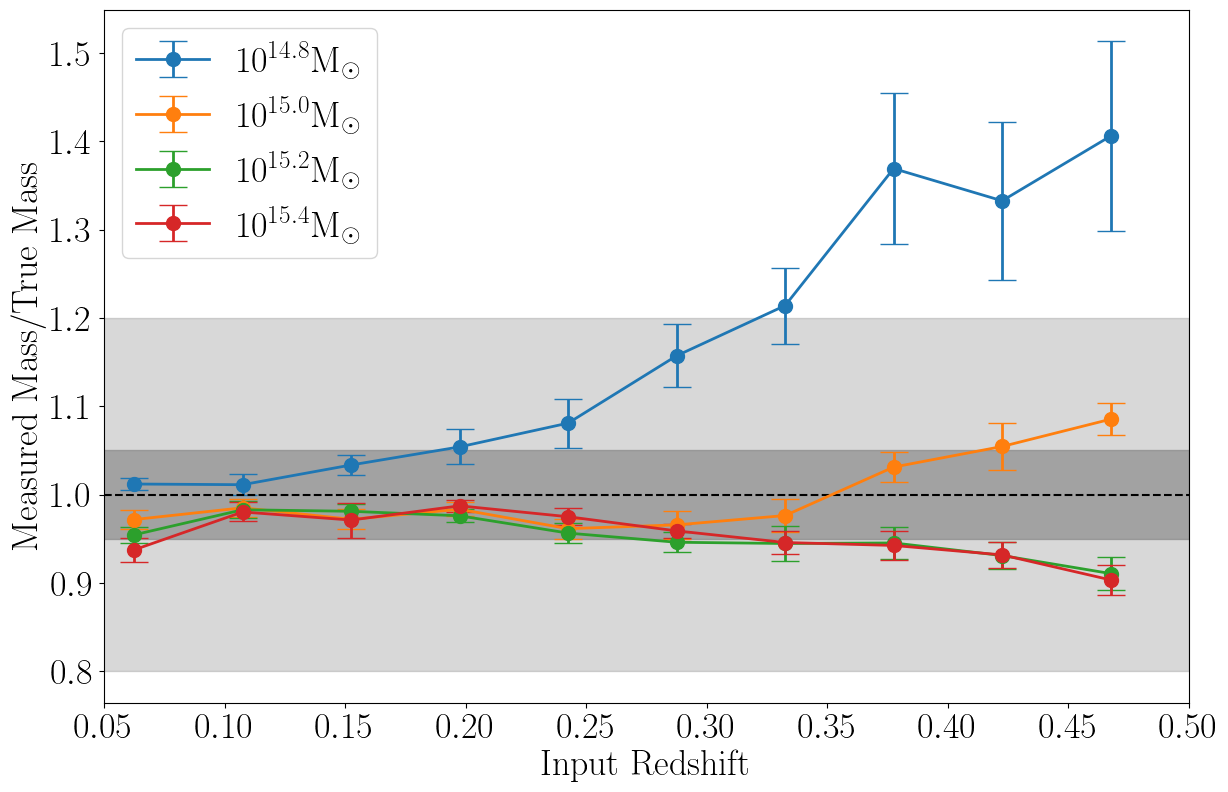

In [140]:
zupper = 0.5
plt.rcParams["figure.figsize"] = (14,9)
font = {'size'   : 26, 'family':'STIXGeneral'}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
capsize = 10
markersize = 10
cmap=plt.get_cmap('tab10')
i=0
axs.errorbar(redshift_vals,np.nanmean(masses[i]/10**true_log_mass[i],axis=1),np.nanstd(masses[i],axis=1)/10**true_log_mass[i],fmt='o-',lw=2,capsize=capsize, markersize = markersize
            ,label = r'$10^{{{}}} \rm{{M_{{\odot}}}}$'.format(true_log_mass[i]))

i=1
axs.errorbar(redshift_vals,np.nanmean(masses[i]/10**true_log_mass[i],axis=1),np.nanstd(masses[i],axis=1)/10**true_log_mass[i],fmt='o-',lw=2,capsize=capsize, markersize = markersize
            , label = r'$10^{{{}}} \rm{{M_{{\odot}}}}$'.format(true_log_mass[i]))
    


i=2
axs.errorbar(redshift_vals,np.nanmean(masses[i]/10**true_log_mass[i],axis=1),np.nanstd(masses[i],axis=1)/10**true_log_mass[i],fmt='o-',lw=2,capsize=capsize, markersize = markersize,
              label = r'$10^{{{}}} \rm{{M_{{\odot}}}}$'.format(true_log_mass[i]))

i=3
axs.errorbar(redshift_vals,np.nanmean(masses[i]/10**true_log_mass[i],axis=1),np.nanstd(masses[i],axis=1)/10**true_log_mass[i],fmt='o-',lw=2,capsize=capsize, markersize = markersize,
              label = r'$10^{{{}}} \rm{{M_{{\odot}}}}$'.format(true_log_mass[i]))


axs.fill_between(np.linspace(0.03,zupper,len(redshift_vals)), 0.95, 1.05,color='gray',alpha=0.6)
axs.fill_between(np.linspace(0.03,zupper,len(redshift_vals)), 0.8, 1.2,color='gray',alpha=0.3)
axs.axhline(1, color='k', linestyle='--')

axs.set_xlim([0.05,zupper])
#axs.plot(np.linspace(0.03,zupper,len(redshift_vals)),1,'--',c='black',label=None)
axs.legend()
axs.set_xlabel(r'Input Redshift')
axs.set_ylabel(r'Measured Mass/True Mass ')
#fig.legend(ncol=5,prop={'size': 18},fontsize=40,loc='center')
#plt.tight_layout()
plt.savefig('PaperPlotsOCT2023/NFWlambda4MassBias.pdf')
plt.show()

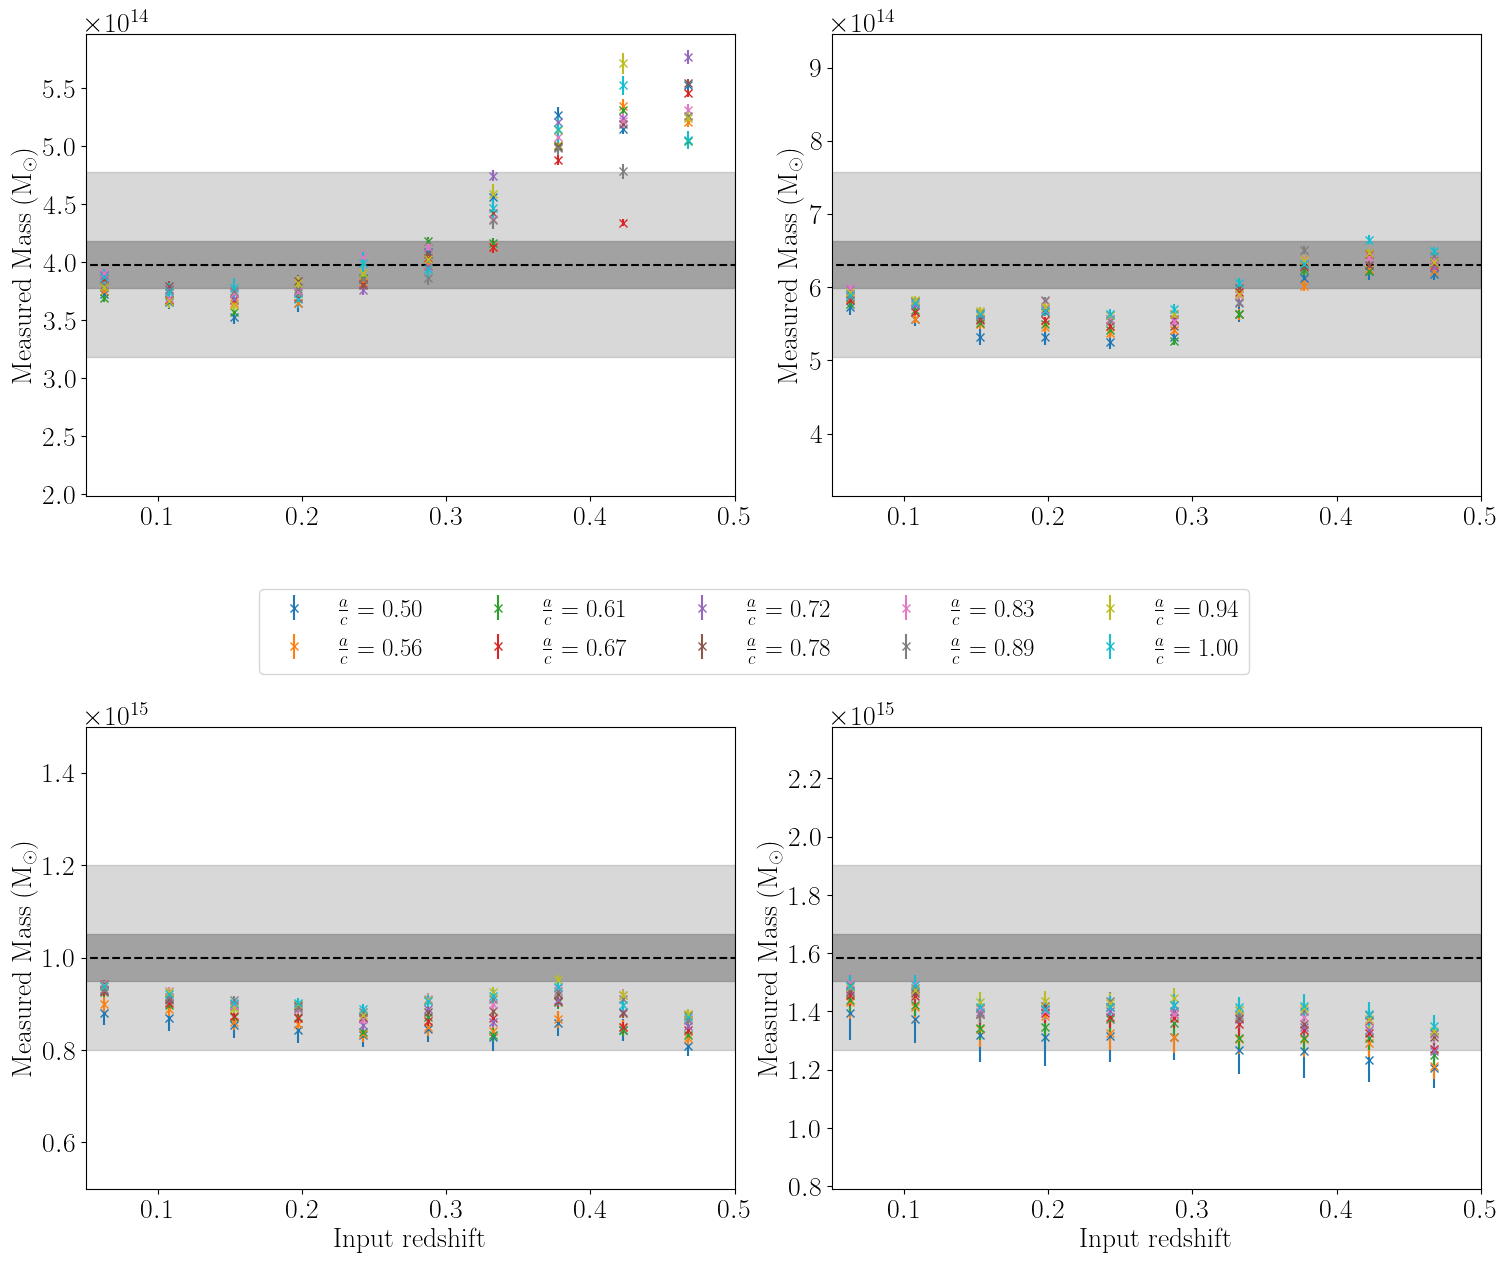

In [10]:
zupper = 0.5
plt.rcParams["figure.figsize"] = (14,9)
font = {'size'   : 20, 'family':'STIXGeneral'}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 15), sharey=False)
cmap=plt.get_cmap('tab10')
for i in range(2):
    for j in range(2):
        mass_vals = np.ones_like(redshift_vals)*10**true_log_mass[i*2+j]
        axs[i,j].plot(np.linspace(0.03,zupper,len(mass_vals)),mass_vals,'--',c='black',label=None)
        for e in range(10):
            color=cmap(e)
            axs[i,j].errorbar(redshift_vals,masses[i*2+j][:,e],masses_std[i*2+j][:,e]/np.sqrt(detect_num[i*2+j,e]),fmt='x',c=color)

        axs[i,j].fill_between(np.linspace(0.03,zupper,len(mass_vals)), 0.95*mass_vals, 1.05*mass_vals,color='gray',alpha=0.6)
        axs[i,j].fill_between(np.linspace(0.03,zupper,len(mass_vals)), 0.8*mass_vals, 1.2*mass_vals,color='gray',alpha=0.3)
        #plt.yscale('log')
        axs[i,j].set_xlim([0.05,zupper])
        axs[i,j].set_ylim([1*10**true_log_mass[i*2+j]*0.5,10**true_log_mass[i*2+j]*1.5])
        #plt.legend(loc=2)
        #axs[i,j].legend(ncol=4,prop={'size': 16},fontsize=40,loc='upper left')
        #axs[i,j].set_xlabel(r'Input redshift')
        axs[i,j].set_ylabel(r'Measured Mass ($\rm{M_{\odot}}$)')
        #axs[i,j].set_yscale('log')
axs[1,0].set_xlabel(r'Input redshift')
axs[1,1].set_xlabel(r'Input redshift')
for e in range(10):
    color=cmap(e)
    axs[0,0].errorbar(redshift_vals,masses[i*2+j][:,e],masses_std[i*2+j][:,e]/np.sqrt(detect_num[i*2+j,e]),fmt='x',c=color,label=r'$\frac{a}{c}=$ $%.2f$' %input_a_over_c_val[e])

# fig.legend(ncol=1,prop={'size': 20},fontsize=40,bbox_to_anchor=(1.12, 0.7))
plt.subplots_adjust(wspace=0.15, hspace=0.5)
fig.legend(ncol=5,prop={'size': 18},fontsize=40,loc='center')
#plt.tight_layout()
#plt.savefig('PaperPlotsSmooth0/CUSPYlambda4MassBias.pdf')
plt.show()

In [35]:
### redshift

In [157]:
# lbd = 2
# z_0 = fits.open('Detection_Redshift/reconstructed_redshift_CUSPY148_lbd4.fits')[0].data
# z_1 = fits.open('Detection_Redshift/reconstructed_redshift_CUSPY150_lbd4.fits')[0].data
# z_2 = fits.open('Detection_Redshift/reconstructed_redshift_CUSPY152_lbd4.fits')[0].data
# z_3 = fits.open('Detection_Redshift/reconstructed_redshift_CUSPY154_lbd4.fits')[0].data
# zs = [z_0,z_1,z_2,z_3]

# #lbd 2, 
# z_std_0 = fits.open('Detection_Redshift/reconstructed_redshift_std_CUSPY148_lbd4.fits')[0].data
# z_std_1 = fits.open('Detection_Redshift/reconstructed_redshift_std_CUSPY150_lbd4.fits')[0].data
# z_std_2 = fits.open('Detection_Redshift/reconstructed_redshift_std_CUSPY152_lbd4.fits')[0].data
# z_std_3 = fits.open('Detection_Redshift/reconstructed_redshift_std_CUSPY154_lbd4.fits')[0].data
# zs_std = [z_std_0,z_std_1,z_std_2,z_std_3]
# #lbd 2, detection number
# detect_num = fits.open('Detection_Params/true_detections_num_nfw_lbd4.fits')[0].data


# lbd = 4
# z_0 = fits.open('Detection_Redshift/reconstructed_redshift_nfw148_lbd4.fits')[0].data
# z_1 = fits.open('Detection_Redshift/reconstructed_redshift_nfw150_lbd4.fits')[0].data
# z_2 = fits.open('Detection_Redshift/reconstructed_redshift_nfw152_lbd4.fits')[0].data
# z_3 = fits.open('Detection_Redshift/reconstructed_redshift_nfw154_lbd4.fits')[0].data
# zs = [z_0,z_1,z_2,z_3]

# #lbd 4, 
# z_std_0 = fits.open('Detection_Redshift/reconstructed_redshift_std_nfw148_lbd4.fits')[0].data
# z_std_1 = fits.open('Detection_Redshift/reconstructed_redshift_std_nfw150_lbd4.fits')[0].data
# z_std_2 = fits.open('Detection_Redshift/reconstructed_redshift_std_nfw152_lbd4.fits')[0].data
# z_std_3 = fits.open('Detection_Redshift/reconstructed_redshift_std_nfw154_lbd4.fits')[0].data
# zs_std = [z_std_0,z_std_1,z_std_2,z_std_3]
# #lbd 2, detection number
# detect_num = fits.open('Detection_Params/true_detections_num_nfw_lbd4.fits')[0].data

# lbd = 2
# z_0 = fits.open('Detection_Redshift/reconstructed_redshift_CUSPY146_lbd2.fits')[0].data
# z_1 = fits.open('Detection_Redshift/reconstructed_redshift_CUSPY148_lbd2.fits')[0].data
# z_2 = fits.open('Detection_Redshift/reconstructed_redshift_CUSPY150_lbd2.fits')[0].data
# z_3 = fits.open('Detection_Redshift/reconstructed_redshift_CUSPY152_lbd2.fits')[0].data
# zs = [z_0,z_1,z_2,z_3]


z_0 = fits.open('Detection_Redshift/reconstructed_redshift_NFW146_lbd2.fits')[0].data
z_1 = fits.open('Detection_Redshift/reconstructed_redshift_NFw148_lbd2.fits')[0].data
z_2 = fits.open('Detection_Redshift/reconstructed_redshift_nfw150_lbd2.fits')[0].data
z_3 = fits.open('Detection_Redshift/reconstructed_redshift_nfw152_lbd2.fits')[0].data
zs = [z_0,z_1,z_2,z_3]

# #lbd 2, 
# z_std_0 = fits.open('Detection_Redshift/reconstructed_redshift_std_CUSPY148_lbd2.fits')[0].data
# z_std_1 = fits.open('Detection_Redshift/reconstructed_redshift_std_CUSPY150_lbd2.fits')[0].data
# z_std_2 = fits.open('Detection_Redshift/reconstructed_redshift_std_CUSPY152_lbd2.fits')[0].data
# z_std_3 = fits.open('Detection_Redshift/reconstructed_redshift_std_CUSPY154_lbd2.fits')[0].data
# zs_std = [z_std_0,z_std_1,z_std_2,z_std_3]
# #lbd 2, detection number
# detect_num = fits.open('Detection_Params/true_detections_num_nfw_lbd4.fits')[0].data

In [158]:
z0 = 0.0625 - (0.1075-0.0625)
#z0 = np.array([z0])
fil_redshift_vals = np.linspace(z0,0.5,10)
#true_log_mass = np.array([14.8,15.0,15.2,15.4]) 
true_log_mass = np.array([14.6,14.8,15.0,15.2]) 

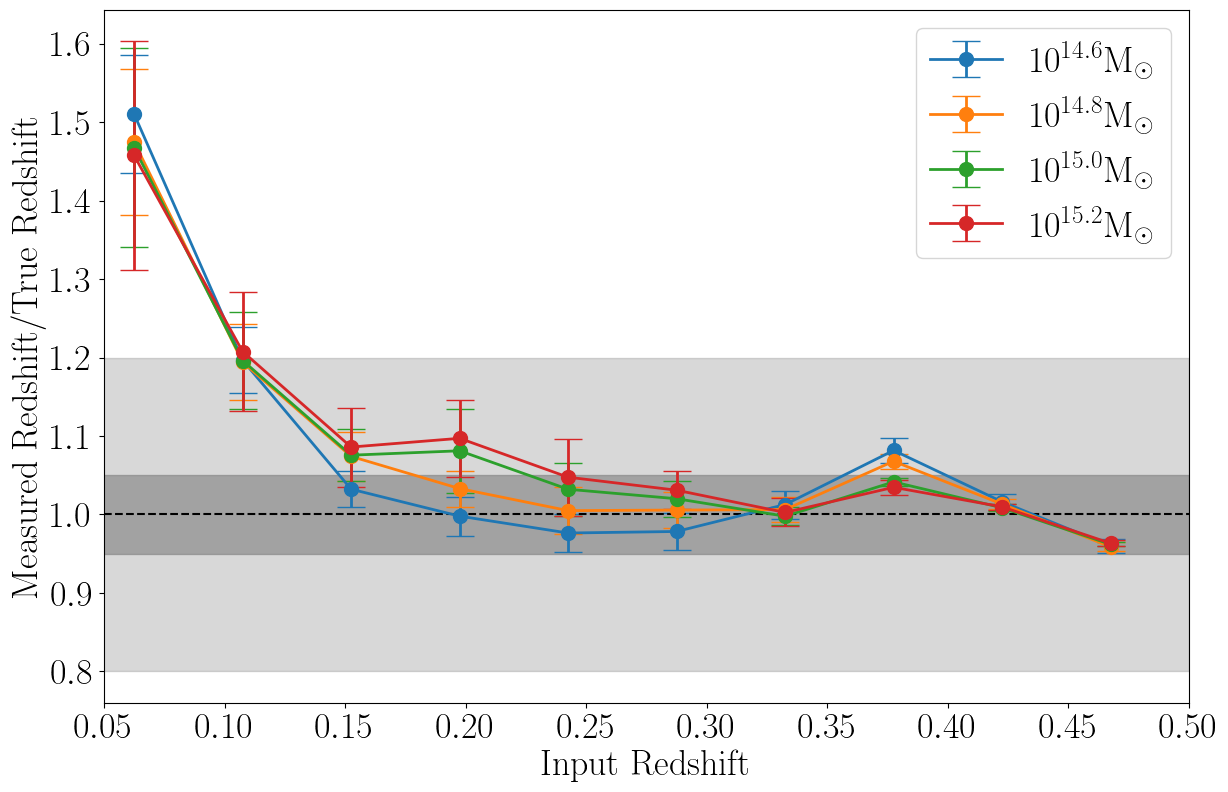

In [159]:
zupper = 0.5
plt.rcParams["figure.figsize"] = (14,9)
font = {'size'   : 26, 'family':'STIXGeneral'}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
capsize = 10
markersize = 10
cmap=plt.get_cmap('tab10')
i=0
axs.errorbar(redshift_vals,np.nanmean(zs[i],axis=1)/redshift_vals,np.nanstd(zs[i],axis=1)/redshift_vals,fmt='o-',lw=2,capsize=capsize, markersize = markersize
            ,label = r'$10^{{{}}} \rm{{M_{{\odot}}}}$'.format(true_log_mass[i]))


i=1
axs.errorbar(redshift_vals,np.nanmean(zs[i],axis=1)/redshift_vals,np.nanstd(zs[i],axis=1)/redshift_vals,fmt='o-',lw=2,capsize=capsize, markersize = markersize
            ,label = r'$10^{{{}}} \rm{{M_{{\odot}}}}$'.format(true_log_mass[i]))

i=2
axs.errorbar(redshift_vals,np.nanmean(zs[i],axis=1)/redshift_vals,np.nanstd(zs[i],axis=1)/redshift_vals,fmt='o-',lw=2,capsize=capsize, markersize = markersize
            ,label = r'$10^{{{}}} \rm{{M_{{\odot}}}}$'.format(true_log_mass[i]))

i=3
axs.errorbar(redshift_vals,np.nanmean(zs[i],axis=1)/redshift_vals,np.nanstd(zs[i],axis=1)/redshift_vals,fmt='o-',lw=2,capsize=capsize, markersize = markersize
            ,label = r'$10^{{{}}} \rm{{M_{{\odot}}}}$'.format(true_log_mass[i]))

axs.fill_between(np.linspace(0.03,zupper,len(redshift_vals)), 0.95, 1.05,color='gray',alpha=0.6)
axs.fill_between(np.linspace(0.03,zupper,len(redshift_vals)), 0.8, 1.2,color='gray',alpha=0.3)
axs.axhline(1, color='k', linestyle='--')

axs.set_xlim([0.05,zupper])
#axs.plot(np.linspace(0.03,zupper,len(redshift_vals)),1,'--',c='black',label=None)
axs.legend()
axs.set_xlabel(r'Input Redshift')
axs.set_ylabel(r'Measured Redshift/True Redshift ')
#fig.legend(ncol=5,prop={'size': 18},fontsize=40,loc='center')
#plt.tight_layout()
plt.savefig('PaperPlotsOCT2023/NFWlambda2Redshift.pdf')
plt.show()

/var/folders/tn/t7f1zc4n47g4wsjd6njxbp0r0000gn/T/ipykernel_90397/500537112.py:10: RuntimeWarning: divide by zero encountered in true_divide
  axs[i,j].errorbar(redshift_vals,zs[i*2+j][:,e],zs_std[i*2+j][:,e]/np.sqrt(detect_num[i*2+j,e]),fmt='x',c=color)
/Users/a1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/var/folders/tn/t7f1zc4n47g4wsjd6njxbp0r0000gn/T/ipykernel_90397/500537112.py:10: RuntimeWarning: divide by zero encountered in true_divide
  axs[i,j].errorbar(redshift_vals,zs[i*2+j][:,e],zs_std[i*2+j][:,e]/np.sqrt(detect_num[i*2+j,e]),fmt='x',c=color)
/var/folders/tn/t7f1zc4n47g4wsjd6njxbp0r0000gn/T/ipykernel_90397/500537112.py:10: RuntimeWarning: invalid value encountered in true_divide
  axs[i,j].errorbar(redshift_vals,zs[i*2+j][:,e],zs_std[i*2+j][:,e]/np.sqrt(detect_num[i*2+j,e]),fmt='x',c=color)
/Users/a1/opt/anaconda3/lib/python3.9/site-packages

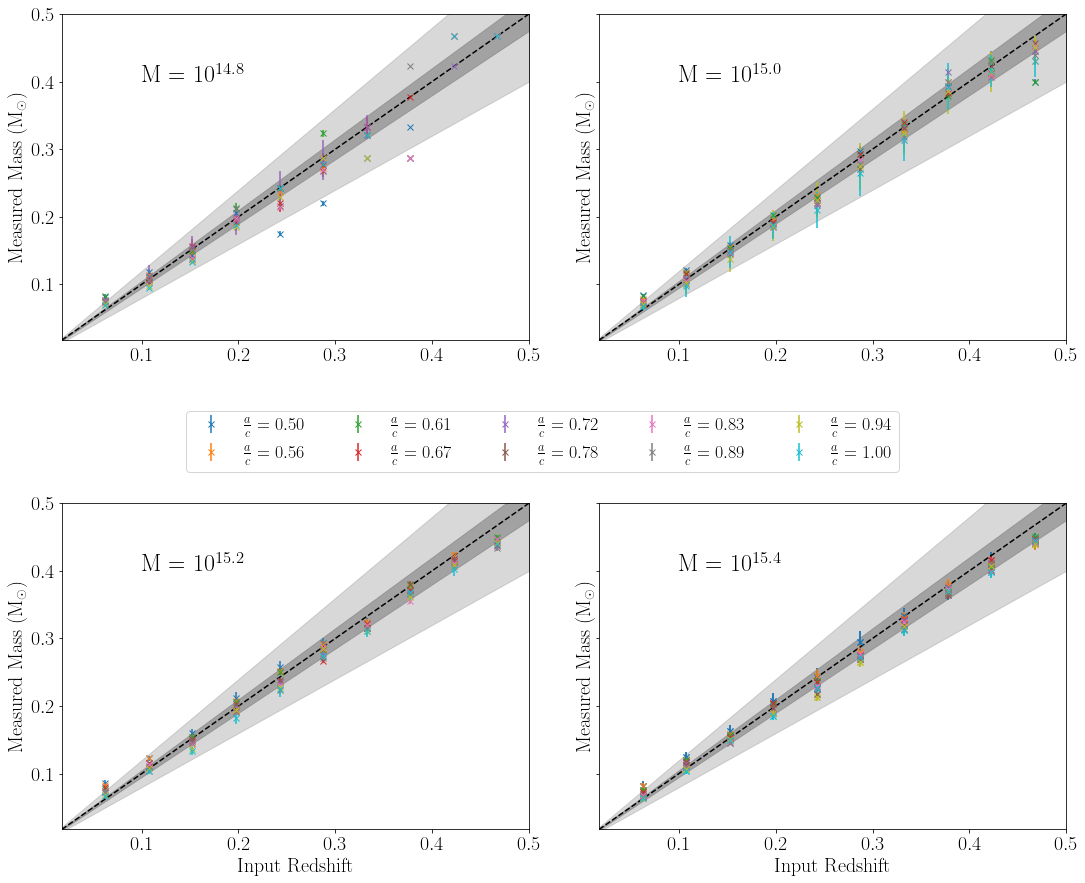

In [63]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 15), sharey=True)
ax_x = 4; ax_y = 1
cmap=plt.get_cmap('tab10')
for i in range(2):
    for j in range(2):
        mass_vals = np.ones_like(redshift_vals)*10**true_log_mass[i*2+j]
        axs[i,j].plot(fil_redshift_vals,fil_redshift_vals,'--',c='black',label=None)
        for e in range(10):
            color=cmap(e)
            axs[i,j].errorbar(redshift_vals,zs[i*2+j][:,e],zs_std[i*2+j][:,e]/np.sqrt(detect_num[i*2+j,e]),fmt='x',c=color)

        axs[i,j].fill_between(fil_redshift_vals, 0.95*fil_redshift_vals, 1.05*fil_redshift_vals,color='gray',alpha=0.6)
        axs[i,j].fill_between(fil_redshift_vals, 0.8*fil_redshift_vals, 1.2*fil_redshift_vals,color='gray',alpha=0.3)
        #plt.yscale('log')
        axs[i,j].set_xlim([fil_redshift_vals[0],fil_redshift_vals[-1]])
        axs[i,j].set_ylim([fil_redshift_vals[0],fil_redshift_vals[-1]])
        #axs[i,j].set_ylim([1*10**true_log_mass[i*2+j]*0.6,10**true_log_mass[i*2+j]*1.4])
        #plt.legend(loc=2)
        #axs[i,j].legend(ncol=4,prop={'size': 16},fontsize=40,loc='upper left')
        #axs[i,j].set_xlabel(r'Input redshift')
        axs[i,j].set_ylabel(r'Measured Mass ($\rm{M_{\odot}}$)')
        # axs[i,j].text(0.1,0.4,'sb')
        #axs[i,j].set_yscale('log')
textfont = 24
axs[0,0].text(0.1,0.4,r'M = $10^{14.8}$', fontsize=textfont)
axs[0,1].text(0.1,0.4,r'M = $10^{15.0}$', fontsize=textfont)
axs[1,0].text(0.1,0.4,r'M = $10^{15.2}$', fontsize=textfont)        
axs[1,1].text(0.1,0.4,r'M = $10^{15.4}$', fontsize=textfont)        
for e in range(10):
            color=cmap(e)
            axs[i,j].errorbar(redshift_vals,zs[i*2+j][:,e],zs_std[i*2+j][:,e]/np.sqrt(detect_num[i*2+j,e]),fmt='x',c=color,label=r'$\frac{a}{c}=$ $%.2f$' %input_a_over_c_val[e])
axs[1,0].set_xlabel(r'Input Redshift')
axs[1,1].set_xlabel(r'Input Redshift')


plt.subplots_adjust(wspace=0.15, hspace=0.5)
fig.legend(ncol=5,prop={'size': 18},fontsize=40,loc='center')
plt.savefig('PaperPlotsSmooth0/CUSPYlambda4RedshiftBias.pdf')
plt.show()
